### **Importing Libraries**

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the Data from CSV File

In [65]:
ds = pd.read_csv('/content/shrink_ray_dataset.csv')

Check if the DataSet is complete or not

In [66]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Power      200 non-null    float64
 1   Shrinkage  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


Splitting the DataSet into Two columns

In [67]:
xColumn = ds.drop(['Shrinkage'], axis = 1)
yColumn = ds['Shrinkage']

Splitting the data again onto two Categories 75% training set and 25% test set

In [78]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(xColumn, yColumn, train_size = 0.75, random_state = 2)

### **Create the model**

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

Train The Model

In [75]:
model = LinearRegression()
model.fit(xTrain, yTrain)

LinearRegression()

Calculate The Accuracy

In [92]:
print(f"Accuracy = {model.score(xTest, yTest)}")

Accuracy = 0.9896244827735191


Plotting Data scttered

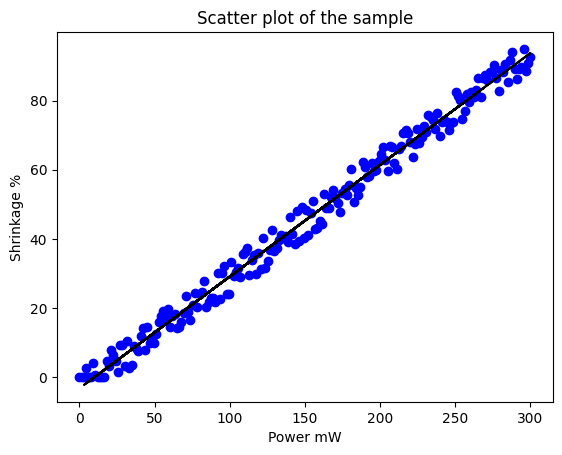

In [82]:
yPred = model.predict(xTest)
plt.scatter(xColumn, yColumn, color ='b')
plt.plot(xTest, yPred, color ='k')

plt.title("Scatter plot of the sample")
plt.xlabel("Power mW")
plt.ylabel("Shrinkage %")
plt.show()

Function that takes output shrinkage and calculate the power needed

In [99]:
b0 = model.intercept_  # Intercept
b1 = model.coef_[0]    # Coefficient for the input feature
output_value = 85

input_value = (output_value - b0) / b1
input_value

273.03331647125685